https://github.com/wesm/pydata-book

https://dev.to/rodolfoferro/sentiment-analysis-on-trumpss-tweets-using-python-



tab --> help finish with function
<br>
shift+tab --. info about variable

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns

# used for example for random
from numpy import *
# for matplot
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [57]:
import IPython.core.display

================================================================================================================================
# <font color='green'>File Input and Output with Arrays</font>

```python
np.save
np.load 
```
are the two workhorse functions for efficiently saving and loading
array data on disk. Arrays are saved by default in an uncompressed raw binary format
with file extension **__.npy.__**

<img src="set_ops.PNG">




# <font color='green'>SLICE and DICE</font>

<font color="#000000">
<ol type="1">
An important first distinction
from lists is that array slices are views on the original array. This means that
<font color="red">the data is not copied, and any modifications to the **view** will be reflected in the source array</font>

As NumPy has
been designed with large data use cases in mind, you could imagine performance and
memory problems if NumPy insisted on copying data left and right.

**<font color='green'>DTYPE</font>**

supported dtypes:
<img src="data_type1.png"> 
<img src="data_type2.png"> 

<font color='green'>**FANCY INDEXING** </font>

# <font color='green'>**==============================================================**</font>

##Difference between Data Frame and Series

Quoting the Pandas docs

```python
pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
```

*Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for Series objects. The primary pandas data structure
(Emphasis mine, sentence fragment not mine)*

So the Series is the datastructure for a single column of a DataFrame, not only conceptually, but literally i.e. the data in a DataFrame is actually stored in memory as a collection of Series.

Analogously: We need both lists and matrices, because matrices are built with lists. Single row matricies, while equivalent to lists in functionality still cannot exists without the list(s) they're composed of.

They both have extremely similar APIs, but you'll find that DataFrame methods always cater to the possibility that you have more than one column. And of course, you can always add another Series (or equivalent object) to a DataFrame, while adding a Series to another Series involves creating a DataFrame.

# <font color='green'>SERIES Data structure</font>

A Series is a one-dimensional array-like object containing an array of data (of any
NumPy data type) and an associated array of data labels, called its <font color="red">index</font>. The simplest
Series is formed from only an array of data:

In [5]:
obj= Series([4,7,-5,3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [6]:
obj.values
obj.index

array([ 4,  7, -5,  3], dtype=int64)

RangeIndex(start=0, stop=4, step=1)

In [7]:
obj2 = Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

<font color='green'>**SERIES operations** </font>

In [8]:
obj2['a']

-5

In [9]:
#using list of values

obj2[["a","b", "c"]]

a   -5
b    7
c    3
dtype: int64

In [10]:
obj2[obj2>0]

d    4
b    7
c    3
dtype: int64

In [11]:
obj2*2


d     8
b    14
a   -10
c     6
dtype: int64

Another way to think about a Series is as a fixed-length, ordered dict, as it is a mapping
of index values to data values. It can be substituted into many functions that expect a
dict:

In [12]:
'b' in obj2
"e" in obj

True

False

In [13]:
#converting dictionary to Series
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = Series(sdata)
obj3


Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

it appears as NaN (not a number) which is considered
in pandas to mark missing or NA values. I will use the terms “missing” or “NA”
to refer to missing data. The 
```python
isnull
notnull 
```

functions in pandas should be used to
detect missing data:

In [14]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = Series(sdata, index=states)
obj4

pd.isnull(obj4)
obj4.isnull()

pd.notnull(obj4)
obj4.notnull()

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

A critical Series feature for many applications is that it automatically aligns differentlyindexed
data in arithmetic operations:

In [15]:
obj3
obj4
obj3+obj4

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

Both the Series object itself and its index have a 
```python
name
```
attribute, which integrates with
other key areas of pandas functionality:

In [16]:
obj4.name = 'population'

obj4.index.name = 'state'

obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [17]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']

obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

# <font color='green'>DataFrame Data structure</font>

A DataFrame represents a tabular, spreadsheet-like data structure containing an ordered
collection of columns, each of which can be a different value type (numeric,
string, boolean, etc.). The DataFrame has both a row and column index; it can be
thought of as a dict of Series (one for all sharing the same index). Compared with other
such DataFrame-like structures you may have used before (like R’s data.frame),

<font color="red"></font>. 
Columns can be modified by assignment.

<font color='green'>**DataFrame creation** </font>

There are numerous ways to construct a DataFrame, though one of the most common
is <font color='red'>from a dict of equal-length lists or NumPy arrays</font>



In [18]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
'year': [2000, 2001, 2002, 2001, 2002],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}

frame = DataFrame(data)

frame

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002


In [19]:
#You can change column sequence

DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9


In [20]:
#As with Series, if you pass a column that isn’t contained in data, it will appear with NA
#values in the result:

frame2 = DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
    index=['one', 'two', 'three', 'four', 'five'])
frame2

frame2.columns

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


Index([u'year', u'state', u'pop', u'debt'], dtype='object')

A column in a DataFrame can be retrieved as a Series either by dict-like notation or by
attribute:

In [21]:
frame2['state']
frame2.year

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64

Rows can also be retrieved by position or name by a couple of methods, such as the

```python
ix
```
indexing field (much more on this later):

<font color='green'>**Column deletion** </font>

The best way to do this in pandas is to use drop:

```python
df = df.drop('column_name', 1)
```
where 1 is the axis number (0 for rows and 1 for columns.)

To delete the column without having to reassign df you can do:

```python
df.drop('column_name', axis=1, inplace=True)
```
Finally, to drop by column number instead of by column label, try this to delete, e.g. the 1st, 2nd and 4th columns:
```python
df.drop(df.columns[[0, 1, 3]], axis=1)  # df.columns is zero-based pd.Index 
```

In [22]:
frame2.ix['three']
#column can be modified by assingment
frame2['debt'] = 16.5

###!!!When assigning lists or arrays to a column, the value’s length must match the length of the DataFrame.

frame2["D"] = np.arange(5)
#frame2["D"] = np.arange(7)  # incorrect as len of range is longer than len of df
frame2
frame2 = frame2.drop(frame2.columns[4], axis=1)
frame2

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

,year,state,pop,debt,D
one,2000,Ohio,1.5,16.5,0
two,2001,Ohio,1.7,16.5,1
three,2002,Ohio,3.6,16.5,2
four,2001,Nevada,2.4,16.5,3
five,2002,Nevada,2.9,16.5,4


,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5


In [23]:
###If you assign a Series, it will be instead conformed exactly to the DataFrame’s index, inserting missing values in any holes:
val = Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
val

frame2['debt'] = val

frame2

two    -1.2
four   -1.5
five   -1.7
dtype: float64

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


In [24]:
#Assigning a column that doesn’t exist will create a new column
frame2['eastern'] = frame2.state == 'Ohio'
frame2['Wojtas faflun'] = 0
frame2


,year,state,pop,debt,eastern,Wojtas faflun
one,2000,Ohio,1.5,NaN,True,0
two,2001,Ohio,1.7,-1.2,True,0
three,2002,Ohio,3.6,NaN,True,0
four,2001,Nevada,2.4,-1.5,False,0
five,2002,Nevada,2.9,-1.7,False,0


In [25]:
del frame2['eastern']
del frame2['Wojtas faflun']
frame2.columns

Index([u'year', u'state', u'pop', u'debt'], dtype='object')

<font color='green'>**NESTED DICT** </font>

If passed to DataFrame, it will interpret the outer dict keys as the columns and the inner
keys as the row indices

<img src="IMG\df_creation.PNG">


In [26]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
    'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
frame3 = DataFrame(pop)
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [27]:
### you can always transpose the result

frame3.T

###Like Series, the values attribute returns the data contained in the DataFrame as a 2Dndarray
frame3.values

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


array([[ nan,  1.5],
       [ 2.4,  1.7],
       [ 2.9,  3.6]])

<font color='green'>**INDEX OBJECTS** </font>

pandas’s Index objects are responsible for holding the axis labels and other metadata
(like the axis name or names). Any array or other sequence of labels used when constructing
a Series or DataFrame is internally converted to an Index

<font color='red'>Index objects are immutable</font> and thus can’t be modified by the user
Immutability is important so that Index objects can be safely shared among datastructures:

In addition to being array-like, an Index also functions as a <font color='red'>fixed-size set</font>

<img src="IMG\pd_index.PNG">

In [28]:
obj = Series(range(3), index=['a', 'b', 'c'])

obj.index
obj.index[2:]

###!!!Index objects are immutable and thus can’t be modified by the user:
obj.index[2] = 'a se sprawdze'

Index([u'a', u'b', u'c'], dtype='object')

Index([u'c'], dtype='object')

TypeError: Index does not support mutable operations

In [30]:
index = pd.Index(np.arange(3))

obj2 = Series([1.5, -2.5, 0], index=index)

obj2.index is index

True

<img src = "df_ix_fun.png">

In [31]:
frame3

'Ohio' in frame3.columns

2002 in frame3.index
2003 in frame3.index
frame3.index.append(pd.Index([2003]))


,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


True

True

False

Int64Index([2000, 2001, 2002, 2003], dtype='int64')

=========================================================================================================================
# <font color='green'>Essential functionalities</font>


<font color='green'>**REINDEXING** </font>

A critical method on pandas objects is reindex, which means to create a new object
with the data conformed to a new index.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html

In [34]:
obj = Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])

obj


d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [37]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

obj.reindex(['a', 'b', 'c', 'd', 'e'], fill_value=0)

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
dtype: float64

For ordered data like time series, it may be desirable to do some interpolation or filling
of values when reindexing. The method option allows us to do this, using a method such
as 
```python
ffill
```
which forward fills the values.

<img src = "IMG\pd_reindex.png">

In [43]:
obj3 = Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3
obj3.reindex(range(6), method='ffill')

0      blue
2    purple
4    yellow
dtype: object

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [49]:
frame = DataFrame(np.arange(9).reshape((3, 3)), index=['a', 'c', 'd'],
    columns=['Ohio', 'Texas', 'California'])
frame
frame.dtypes

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


Ohio          int32
Texas         int32
California    int32
dtype: object

In [59]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])

#frame2.astype(int)  # it's not possible to change to int, see explanation below
frame2.dtypes


Ohio          float64
Texas         float64
California    float64
dtype: object

<img src = "IMG\pd_Nan.png">

In [61]:
states = ['Texas', 'Utah', 'California']
frame
frame.reindex(columns=states)

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


<img src = "IMG\pd_reix.png">

In [62]:
###!!!Both can be reindexed in one shot, though interpolation will only apply row-wise (axis 0)
frame.reindex(index=['a', 'b', 'c', 'd'], method='ffill',
    columns=states)

,Texas,Utah,California
a,1,NaN,2
b,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [63]:
frame
frame.ix[['a', 'b', 'c', 'd'], states]

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


,Texas,Utah,California
a,1.0,NaN,2.0
b,NaN,NaN,NaN
c,4.0,NaN,5.0
d,7.0,NaN,8.0


<font color='green'>**Dropping entries from axis** </font>

In [67]:
obj = Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj
obj.drop('c')


a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [78]:
a = np.arange(16)
a

a.reshape(4,4)


data = DataFrame(np.arange(16).reshape((4, 4)),
    index=['Ohio', 'Colorado', 'Utah', 'New York'],
    columns=['one', 'two', 'three', 'four'])
data

# removing rows (axis = 0)
data.drop('Colorado')

# removing columns 
data.drop('two', axis = 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


,one,two,three,four
Ohio,0,1,2,3
Utah,8,9,10,11
New York,12,13,14,15


,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


<font color='green'>**Indexing, selection, and filtering** </font>

Slicing with labels behaves differently than normal Python slicing in that the <font color='red'>**endpoint
is inclusive**</font>

In [83]:
#Series indexing work like in NumPy
obj = Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj
obj['b']
obj[1]

obj[2:4]
obj[['b', 'a', 'd']]

obj[obj < 2]

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

1.0

1.0

c    2.0
d    3.0
dtype: float64

b    1.0
a    0.0
d    3.0
dtype: float64

a    0.0
b    1.0
dtype: float64

In [86]:
#end point is inclusive
obj['b':'c']

obj['b':'c'] = 5
obj

b    5.0
c    5.0
dtype: float64

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

In [89]:
data = DataFrame(np.arange(16).reshape((4, 4)),
    index=['Ohio', 'Colorado', 'Utah', 'New York'],
    columns=['one', 'two', 'three', 'four'])

data
data['two']
data[['three', 'one']]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


INDEXING WITH BOOLEAN

In [92]:
data[:2]

data[data['three'] > 6]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [93]:
data < 5
data[data < 5] = 0
data

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [100]:
data.ix['Colorado', ['two', 'three']]

data.ix[['Colorado', 'Utah'], [3, 0, 1]]

data.ix[2]
data.ix[:'Utah', 'two']

data.ix[data.three > 6, :3]

two      5
three    6
Name: Colorado, dtype: int32

,four,one,two
Colorado,7,0,5
Utah,11,8,9


one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int32

,one,two,three
Utah,8,9,10
New York,12,13,14


# <font color='green'>Arithmetic and data alignment</font>
One of the most important pandas features is the behavior of arithmetic between objects
with different indexes. When adding together objects, if any index pairs are not
the same, the respective index in the result will be the union of the index pairs.

In the case of DataFrame, alignment is performed on both the rows and the columns:

In [102]:
s1 = Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])
s1
s2

s1 + s2

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

The internal data alignment introduces NA values in the indices that don’t overlap.
Missing values propagate in arithmetic computations.

In [105]:
df1 = DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
    index=['Ohio', 'Texas', 'Colorado'])
df2 = DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
    index=['Utah', 'Ohio', 'Texas', 'Oregon'])

df1
df2
### Adding these together returns a DataFrame whose index and columns are the unions of the ones in each DataFrame
df1 +df2

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


<font color='green'>**Arithmetic methods with fill values**</font>
<br>In arithmetic operations between differently-indexed objects, you might want to fill
with a special value, like 0, when an axis label is found in one object but not the other:

<img src="IMG\pd_flex_arith.png">

In [109]:
df1 = DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df2 = DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))

df1
df2

df1 + df2

df1.add(df2, fill_value=0)

df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


Operations between DataFrame and Series

In [112]:
arr = np.arange(12.).reshape((3, 4))
arr

arr[0]
arr - arr[0]

array([[  0.,   1.,   2.,   3.],
       [  4.,   5.,   6.,   7.],
       [  8.,   9.,  10.,  11.]])

array([ 0.,  1.,  2.,  3.])

array([[ 0.,  0.,  0.,  0.],
       [ 4.,  4.,  4.,  4.],
       [ 8.,  8.,  8.,  8.]])

In [116]:
frame = DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
    index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame 

series = frame.ix[0]
series

frame - series

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


<ol type="1">
<li>By default, arithmetic between DataFrame and Series matches the index of the Series
on the DataFrame's columns, broadcasting down the rows

<li>If an index value is not found in either the DataFrame’s columns or the Series’s index,
the objects will be reindexed to form the union

In [118]:
series2 = Series(range(3), index=['b', 'e', 'f'])
series2
frame + series2

b    0
e    1
f    2
dtype: int64

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [121]:
series3 = frame['d']
frame
series3

frame.sub(series3, axis=0)

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


# <font color='green'>Function application and mapping</font>
<br> NumPy ufuncs (element-wise array methods) work fine with pandas objects

In [4]:
frame = DataFrame(np.random.randn(4, 3), columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])

frame
# absolute value = wartość bezwzględna

np.abs(frame)

,b,d,e
Utah,-0.250496,0.708899,-1.056736
Ohio,-1.027431,1.150337,0.391049
Texas,-1.046852,0.142367,-0.521215
Oregon,-0.703335,-0.390194,0.902028


,b,d,e
Utah,0.250496,0.708899,1.056736
Ohio,1.027431,1.150337,0.391049
Texas,1.046852,0.142367,0.521215
Oregon,0.703335,0.390194,0.902028


Another frequent operation is applying a function on 1D arrays to each column or row.
DataFrame’s 
```python
apply()
```
method does exactly this:

```python
lambda
```
The lambda operator or lambda function is a way to create small anonymous functions, i.e. functions without a name. These functions are throw-away functions, i.e. they are just needed where they have been created. Lambda functions are mainly used in combination with the functions filter(), map() and reduce(). The lambda feature was added to Python due to the demand from Lisp programmers. 

https://www.python-course.eu/lambda.php

In [6]:
f = lambda x: x.max() - x.min()
frame.apply(f)

frame.apply(f, axis=1)

b    0.796356
d    1.540531
e    1.958765
dtype: float64

Utah      1.765635
Ohio      2.177767
Texas     1.189219
Oregon    1.605363
dtype: float64

The function passed to apply need not return a scalar value, it can also return a Series
with multiple values:

In [10]:
def f(x): 
    return Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f)

,b,d,e
min,-1.046852,-0.390194,-1.056736
max,-0.250496,1.150337,0.902028


In [11]:
format = lambda x: '%.2f' % x
frame.applymap(format)

,b,d,e
Utah,-0.25,0.71,-1.06
Ohio,-1.03,1.15,0.39
Texas,-1.05,0.14,-0.52
Oregon,-0.70,-0.39,0.90


The reason for the name 
```python
applymap()
```
is that Series has a 
```python
map
```
method for applying an element-
wise function:

In [16]:
frame['e'].map(format)

Utah      -1.06
Ohio       0.39
Texas     -0.52
Oregon     0.90
Name: e, dtype: object

# <font color='green'>Sorting and ranking</font>
<br> Sorting a data set by some criterion is another important built-in operation. To sort
lexicographically by row or column index, use the 
```python
sort_index
```
method, which returns
a new, sorted object:

In [21]:
obj = Series(range(4), index=['d', 'a', 'b', 'c'])
obj
obj.sort_index()

d    0
a    1
b    2
c    3
dtype: int64

a    1
b    2
c    3
d    0
dtype: int64

With a DataFrame, you can sort by index on either axis:
<br><br>The data is sorted in ascending order by default, but can be sorted in descending order,
too:

In [23]:
frame = DataFrame(np.arange(8).reshape((2, 4)), index=['three', 'one'],
                  columns=['d', 'a', 'b', 'c'])
frame
frame.sort_index()
frame.sort_index(axis = 1)
frame.sort_index(axis=1, ascending=False)

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


,d,a,b,c
one,4,5,6,7
three,0,1,2,3


,a,b,c,d
three,1,2,3,0
one,5,6,7,4


,d,c,b,a
three,0,3,2,1
one,4,7,6,5


To sort a Series by its values, use its 
```python
order
```
method:

In [26]:
obj = Series([4, 7, -3, 2])
obj
obj.order()

#Any missing values are sorted to the end of the Series by default:
obj = Series([4, np.nan, 7, np.nan, -3, 2])
obj.order()

0    4
1    7
2   -3
3    2
dtype: int64

C:\Users\Wojtek Biedzinski\Anaconda3\envs\Dand\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


2   -3
3    2
0    4
1    7
dtype: int64

C:\Users\Wojtek Biedzinski\Anaconda3\envs\Dand\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: order is deprecated, use sort_values(...)


4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

On DataFrame, you may want to sort by the values in one or more columns. To do so,
pass one or more column names to the by option:

In [27]:
frame = DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame 
frame.sort_index(by='b')

,a,b
0,0,4
1,1,7
2,0,-3
3,1,2


C:\Users\Wojtek Biedzinski\Anaconda3\envs\Dand\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,a,b
2,0,-3
3,1,2
0,0,4
1,1,7


In [28]:
#To sort by multiple columns, pass a list of names:
frame.sort_index(by=['a', 'b'])

C:\Users\Wojtek Biedzinski\Anaconda3\envs\Dand\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


,a,b
2,0,-3
0,0,4
3,1,2
1,1,7


Ranking is closely related to sorting, assigning ranks from one through the number of
valid data points in an array. It is similar to the indirect sort indices produced by
numpy.argsort, except that ties are broken according to a rule. The 

```python
rank()
```
methods for
Series and DataFrame are the place to look; by default rank breaks ties by assigning
each group the mean rank

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rank.html

<img src="IMG\pd_rank.PNG">

In [35]:
# zwracan ranking miejsc tj.. zwraca 1 dla obiektu, który powinnien być pierwszy
obj = Series([7, -5, 7, 4, 2, 0, 4])
obj
obj.rank()
#Ranks can also be assigned according to the order they’re observed in the data:
obj.rank(method='first') #ranks assigned in order they appear in the array
obj.rank(method='min') #lowest rank in group
obj.rank(method='average') #average rank in group

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

0    6.0
1    1.0
2    6.0
3    4.0
4    3.0
5    2.0
6    4.0
dtype: float64

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [36]:
#Naturally, you can rank in descending order, too:
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [37]:
frame = DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
                   'c': [-2, 5, 8, -2.5]})
frame 
frame.rank(axis=1)

,a,b,c
0,0,4.3,-2.0
1,1,7.0,5.0
2,0,-3.0,8.0
3,1,2.0,-2.5


,a,b,c
0,2.0,3.0,1.0
1,1.0,3.0,2.0
2,2.0,1.0,3.0
3,2.0,3.0,1.0


# <font color='green'>Axis indexes with duplicate values</font>
Up until now all of the examples I’ve showed you have had unique axis labels (index
values). While many pandas functions (like reindex) require that the labels be unique,
it’s not mandatory. Let’s consider a small Series with duplicate indices:

In [39]:
obj = Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

#The index’s is_unique property can tell you whether its values are unique or not:
obj.index.is_unique

#Data selection is one of the main things that behaves differently with duplicates. 
#Indexing a value with multiple entries returns a Series while single entries return a scalar value:
obj['a']
obj['c']

a    0
a    1
b    2
b    3
c    4
dtype: int64

False

a    0
a    1
dtype: int64

4

In [40]:
#The same logic extends to indexing rows in a DataFrame:
df = DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df
df.ix['b']

,0,1,2
a,0.393275,0.987598,0.545625
a,0.224793,-3.188334,-0.184531
b,0.043456,1.424314,0.077632
b,0.345386,0.099457,-0.499891


,0,1,2
b,0.043456,1.424314,0.077632
b,0.345386,0.099457,-0.499891


# <font color='green'>**==============================================================**</font>

# <font color='green'>Summarizing and Computing Descriptive Statistics</font>

137
<br><br>
pandas objects are equipped with a set of common mathematical and statistical methods.
Most of these fall into the category of reductions or summary statistics, methods
that extract a single value (like the sum or mean) from a Series or a Series of values from
the rows or columns of a DataFrame. Compared with the equivalent methods of vanilla
NumPy arrays, they are all built from the ground up to exclude missing data. Consider
a small DataFrame:

In [43]:
df = DataFrame([[1.4, np.nan], [7.1, -4.5],
    [np.nan, np.nan], [0.75, -1.3]],
    index=['a', 'b', 'c', 'd'],
    columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [45]:
df.sum()

df.sum(axis = 1)


one    9.25
two   -5.80
dtype: float64

a    1.40
b    2.60
c     NaN
d   -0.55
dtype: float64

NA values are excluded unless the entire slice (row or column in this case) is NA. This
can be disabled using the option
```python
 skipna 
 ```

In [46]:
df.mean(axis=1,skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

!!! TO explore
https://pandas.pydata.org/pandas-docs/stable/advanced.html
multiINDEX

<img src = "IMG\pd_reduc.png">

Some methods, like 
```python
idxmin 
and 
idxmax
```

, return indirect statistics like the index value
where the minimum or maximum values are attained:

In [55]:
df.idxmax()
df.idxmax(axis=1, skipna = True)
df.idxmax(1)
# in Numpy it is argmax() function

one    b
two    d
dtype: object

a    one
b    one
c    NaN
d    one
dtype: object

a    one
b    one
c    NaN
d    one
dtype: object

In [57]:
df
df.cumsum()
df.cumsum(1)
#suma kumulowana

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


,one,two
a,1.40,NaN
b,7.10,2.60
c,NaN,NaN
d,0.75,-0.55


Another type of method is neither a reduction nor an accumulation. 
```python
describe()
```
is one
such example, producing multiple summary statistics in one shot:

In [58]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


On non-numeric data, describe produces alternate summary statistics:

In [70]:
obj1 = Series(['a','a','b', 'c']*4)
obj = DataFrame(obj1.reshape(4,4), columns = list('abdc'), index = [1, 2, 3, 4])
obj

obj.describe()
obj1.describe()

C:\Users\Wojtek Biedzinski\Anaconda3\envs\Dand\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


,a,b,d,c
1,a,a,b,c
2,a,a,b,c
3,a,a,b,c
4,a,a,b,c


,a,b,d,c
count,4,4,4,4
unique,1,1,1,1
top,a,a,b,c
freq,4,4,4,4


count     16
unique     3
top        a
freq       8
dtype: object

<img src = "IMG\pd_stat.png">

# <font color='green'>Correlation and Covariance</font>
<br>
Passing axis=1 does things row-wise instead. In all cases, the data points are aligned by
label before computing the correlation.
<br><br>
Some summary statistics, like correlation and covariance, are computed from pairs of
arguments. Let’s consider some DataFrames of stock prices and volumes obtained from
Yahoo! Finance:

In [72]:
%%cmd
pip install pandas_datareader

Microsoft Windows [Version 10.0.15063]
(c) 2017 Microsoft Corporation. All rights reserved.

(Dand) C:\Users\Wojtek Biedzinski\Documents\GitHub\DS_Python>pip install pandas_datareader
  Running setup.py bdist_wheel for requests-ftp: started
  Running setup.py bdist_wheel for requests-ftp: finished with status 'done'
  Stored in directory: C:\Users\Wojtek Biedzinski\AppData\Local\pip\Cache\wheels\76\fb\0d\1026eb562c34a4982dc9d39c9c582a734eefe7f0455f711deb
  Running setup.py bdist_wheel for requests-file: started
  Running setup.py bdist_wheel for requests-file: finished with status 'done'
  Stored in directory: C:\Users\Wojtek Biedzinski\AppData\Local\pip\Cache\wheels\3e\34\3a\c2e634ca7b545510c1b3b7d94dea084e5fdb5f33558f3c3a81
Successfully built requests-ftp requests-file

(Dand) C:\Users\Wojtek Biedzinski\Documents\GitHub\DS_Python>

```python
head(n)
```
returns first n-rows
```python
tail(n)
```
returns last n-rows

In [17]:
#from pandas_datareader import data, wb
#below works only for PYTHON 3

price = pd.read_pickle('IMG/yahoo_price.pkl')
volume = pd.read_pickle('IMG/yahoo_volume.pkl')

type(price)
#display n first rows .head(n)

price.head(5)

volume.head(5)
price.shape

pandas.core.frame.DataFrame

,AAPL,GOOG,IBM,MSFT
Date,,,,
2010-01-04,27.990226,313.062468,113.304536,25.884104
2010-01-05,28.038618,311.683844,111.935822,25.892466
2010-01-06,27.592626,303.826685,111.208683,25.733566
2010-01-07,27.541619,296.753749,110.823732,25.465944
2010-01-08,27.724725,300.709808,111.935822,25.641571


,AAPL,GOOG,IBM,MSFT
Date,,,,
2010-01-04,123432400,3927000,6155300,38409100
2010-01-05,150476200,6031900,6841400,49749600
2010-01-06,138040000,7987100,5605300,58182400
2010-01-07,119282800,12876600,5840600,50559700
2010-01-08,111902700,9483900,4197200,51197400


(1714, 4)

In [20]:
#I now compute percent changes of the prices
returns = price.pct_change()

type(returns)
returns.shape

returns.head(5)
returns.tail()

pandas.core.frame.DataFrame

(1714, 4)

,AAPL,GOOG,IBM,MSFT
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.001729,-0.004404,-0.012080,0.000323
2010-01-06,-0.015906,-0.025209,-0.006496,-0.006137
2010-01-07,-0.001849,-0.023280,-0.003462,-0.010400
2010-01-08,0.006648,0.013331,0.010035,0.006897


,AAPL,GOOG,IBM,MSFT
Date,,,,
2016-10-17,-0.000680,0.001837,0.002072,-0.003483
2016-10-18,-0.000681,0.019616,-0.026168,0.007690
2016-10-19,-0.002979,0.007846,0.003583,-0.002255
2016-10-20,-0.000512,-0.005652,0.001719,-0.004867
2016-10-21,-0.003930,0.003011,-0.012474,0.042096


The 
```python
corr 
```
method of Series computes the correlation of the overlapping, non-NA,
aligned-by-index values in two Series. Relatedly, 

```python
cov
```
computes the covariance:

In [22]:
returns.corr()
returns.cov()

,AAPL,GOOG,IBM,MSFT
AAPL,1.000000,0.407919,0.386817,0.389695
GOOG,0.407919,1.000000,0.405099,0.465919
IBM,0.386817,0.405099,1.000000,0.499764
MSFT,0.389695,0.465919,0.499764,1.000000


,AAPL,GOOG,IBM,MSFT
AAPL,0.000277,0.000107,0.000078,0.000095
GOOG,0.000107,0.000251,0.000078,0.000108
IBM,0.000078,0.000078,0.000146,0.000089
MSFT,0.000095,0.000108,0.000089,0.000215


Using DataFrame’s 
```python
corrwith
```
method, you can compute pairwise correlations between
a DataFrame’s columns or rows with another Series or DataFrame. Passing a Series
returns a Series with the correlation value computed for each column:

In [62]:
returns.IBM.head(5)
returns.corrwith(returns.IBM)



Date
2010-01-04         NaN
2010-01-05   -0.012080
2010-01-06   -0.006496
2010-01-07   -0.003462
2010-01-08    0.010035
Name: IBM, dtype: float64

AAPL    0.386817
GOOG    0.405099
IBM     1.000000
MSFT    0.499764
dtype: float64

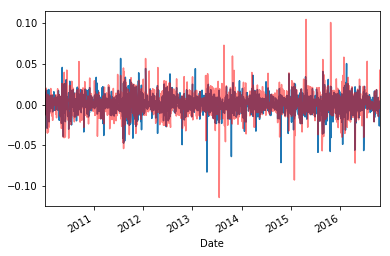

In [36]:
returns.IBM.plot()

returns.MSFT.plot(alpha =0.5, color='r')


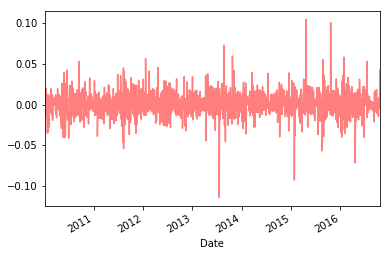

In [34]:
### warto ogarnać jak robić kilka plotów.subplot?
returns.MSFT.plot(alpha =0.5, color='r')

Basic of matplot lib in PL
http://www.python.rk.edu.pl/w/p/matplotlib/

# <font color='green'>Unique Values, Value Counts, and Membership</font>

The first function is unique, which gives you an array of the unique values in a Series:

The unique values are not necessarily returned in sorted order, but could be sorted after
the fact if needed (uniques.sort()). Relatedly, value_counts computes a Series containing
value frequencies:

The Series is sorted by value in descending order as a convenience. value_counts is also
available as a top-level pandas method that can be used with any array or sequence:
<img src = "IMG\pd_uni.png">

In [140]:
obj = Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
obj
uniques = obj.unique()
uniques
uniques.sort()

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

array(['c', 'a', 'd', 'b'], dtype=object)

In [45]:
obj.value_counts(0)

pd.value_counts(obj.values, sort=False)


c    3
a    3
b    2
d    1
dtype: int64

b    2
a    3
d    1
c    3
dtype: int64

Lastly, 
```python
isin
```
is responsible for vectorized set membership and can be very useful in
filtering a data set down to a subset of values in a Series or column in a DataFrame:

In [54]:
mask = obj.isin(["b","c"])
mask
obj[mask]

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

0    c
5    b
6    b
7    c
8    c
dtype: object

In [63]:
data = DataFrame({'Qu1': [1, 3, 4, 3, 4],
    'Qu2': [2, 3, 1, 2, 3],
    'Qu3': [1, 5, 2, 4, 4]})
data

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 2 else 'black'
    return 'color: %s' % color


s = data.style.applymap(color_negative_red)
s

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


styling in DataFRames:
https://pandas.pydata.org/pandas-docs/stable/style.html

In [73]:
#Passing pandas.value_counts to this DataFrame’s apply function gives

result = data.apply(pd.value_counts)
result

result = data.apply(pd.value_counts).fillna("Monia wymiata")
result

result = data.apply(pd.value_counts).fillna(0)
result
###!!! value_counts is only applicable to Series
data.Qu1.value_counts
data.value_counts


,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


,Qu1,Qu2,Qu3
1,1,1,1
2,Monia wymiata,2,1
3,2,2,Monia wymiata
4,2,Monia wymiata,2
5,Monia wymiata,Monia wymiata,1


,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


<bound method IndexOpsMixin.value_counts of 0    1
1    3
2    4
3    3
4    4
Name: Qu1, dtype: int64>

AttributeError: 'DataFrame' object has no attribute 'value_counts'

# <font color='green'>Handling missing data</font>
Missing data is common in most data analysis applications. One of the goals in designing
pandas was to make working with missing data as painless as possible. For
example, all of the descriptive statistics on pandas objects exclude missing data as
you’ve seen earlier in the chapter.
pandas uses the floating point value NaN (Not a Number)
```python
NaN
```
to represent missing data in
both floating as well as in non-floating point arrays. It is just used as a sentinel that can
be easily detected:

In [77]:
string_data = Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data
string_data.isnull()
string_data.isnull().sum()

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

0    False
1    False
2     True
3    False
dtype: bool

1

I do not claim that pandas’s NA representation is optimal, but it is simple and reasonably
consistent. It’s the best solution, with good all-around performance characteristics
and a simple API, that I could concoct in the absence of a true NA data type or bit
pattern in NumPy’s data types. Ongoing development work in NumPy may change this
in the future.

<img src = "IMG\np_NA.png">

<font color = 'green'>**Filtering Out Missing Data**</font>
<br><br>You have a number of options for filtering out missing data. While doing it by hand is
always an option, dropna can be very helpful. On a Series, it returns the Series with only
the non-null data and index values:



In [84]:
from numpy import nan as NA

data = Series([1, NA, 3.5, NA, 7])
data
data.dropna()
#Naturally, you could have computed this yourself by boolean indexing:
data[data.notnull()]

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

0    1.0
2    3.5
4    7.0
dtype: float64

0    1.0
2    3.5
4    7.0
dtype: float64

With DataFrame objects, these are a bit more complex. You may want to drop rows
or columns which are all NA or just those containing any NAs. dropna by default drops
any row containing a missing value
<br>
Passing 
```python
how='all'
```
will only drop rows that are all NA:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html

In [89]:
data = DataFrame([[1., 6.5, 3.], [1., NA, NA],[NA, NA, NA], [NA, 6.5, 3.]])
data

cleaned = data.dropna()
cleaned

data.dropna(how = "all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


,0,1,2
0,1.0,6.5,3.0


,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [93]:
#Dropping columns in the same way is only a matter of passing axis=1:
data[4] = NA
data
data.dropna(axis = 1, how = "all")

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


A related way to filter out DataFrame rows tends to concern time series data. Suppose
you want to keep only rows containing a certain number of observations. You can
indicate this with the 
```python
thresh
```
argument:

In [119]:
df = DataFrame(np.random.randn(7, 3))
df
df.ix[:4,1] = NA
df.ix[:2,2] = NA
df
#Keep only the rows with at least 3 non-NaN values
df.dropna(thresh = 3)
df.dropna(thresh = 2)

,0,1,2
0,0.742784,-1.103589,0.041630
1,0.164792,-0.346466,0.993374
2,0.431032,-0.365330,-1.371596
3,-1.708691,-0.432980,-0.243124
4,0.157237,-0.486052,-0.258159
5,-0.547274,1.382052,-0.979845
6,-1.414231,0.295213,-0.781077


C:\Users\Wojtek Biedzinski\Anaconda3\envs\Python_DataCamp\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2
0,0.742784,NaN,NaN
1,0.164792,NaN,NaN
2,0.431032,NaN,NaN
3,-1.708691,NaN,-0.243124
4,0.157237,NaN,-0.258159
5,-0.547274,1.382052,-0.979845
6,-1.414231,0.295213,-0.781077


,0,1,2
5,-0.547274,1.382052,-0.979845
6,-1.414231,0.295213,-0.781077


,0,1,2
3,-1.708691,NaN,-0.243124
4,0.157237,NaN,-0.258159
5,-0.547274,1.382052,-0.979845
6,-1.414231,0.295213,-0.781077


<font color = 'green'>**Filling in Missing Data**</font>
<br><br>Rather than filtering out missing data (and potentially discarding other data along with
it), you may want to fill in the “holes” in any number of ways. For most purposes, the
fillna method is the workhorse function to use. Calling fillna with a constant replaces
missing values with that value:

In [106]:
df.fillna(0)

,0,1,2
0,-0.488038,0.000000,0.000000
1,2.439349,0.000000,0.000000
2,-1.160771,0.000000,0.000000
3,0.798614,0.000000,0.693137
4,0.432856,0.000000,-0.589139
5,-0.417998,0.715004,-0.047938
6,-0.503260,0.991246,0.949148


Calling 
```pyhon
fillna
```
with a dict you can use a different fill value for each column
<br><br>
fillna returns a new object, but you can modify the existing object in place:

In [120]:
# df.fillna({column: value_to_replace)

df.fillna({1: 0.5, 3: -1})

df.fillna({1: 0.5, 2: "Monia znów wymiotła"})
###!!!this is creating copy and not changing nplace itself, to change it look below
df

,0,1,2
0,0.742784,0.500000,NaN
1,0.164792,0.500000,NaN
2,0.431032,0.500000,NaN
3,-1.708691,0.500000,-0.243124
4,0.157237,0.500000,-0.258159
5,-0.547274,1.382052,-0.979845
6,-1.414231,0.295213,-0.781077


,0,1,2
0,0.742784,0.500000,Monia znów wymiotła
1,0.164792,0.500000,Monia znów wymiotła
2,0.431032,0.500000,Monia znów wymiotła
3,-1.708691,0.500000,-0.243124
4,0.157237,0.500000,-0.258159
5,-0.547274,1.382052,-0.979845
6,-1.414231,0.295213,-0.781077


,0,1,2
0,0.742784,NaN,NaN
1,0.164792,NaN,NaN
2,0.431032,NaN,NaN
3,-1.708691,NaN,-0.243124
4,0.157237,NaN,-0.258159
5,-0.547274,1.382052,-0.979845
6,-1.414231,0.295213,-0.781077


In [117]:
#fillna returns a new object, but you can modify the existing object in place:
# always returns a reference to the filled object
_ = df.fillna(0, inplace=True)
df

,0,1,2
0,-0.566041,0.000000,0.000000
1,1.291364,0.000000,0.000000
2,1.047840,0.000000,0.000000
3,2.086349,0.000000,0.504982
4,0.484970,0.000000,0.736829
5,0.051769,-0.711065,-0.645441
6,0.878510,-1.259075,0.137367


<img src = "IMG\pd_fillna.png">
https://pandas.pydata.org/pandas-docs/stable/missing_data.html

<img src = "IMG\pd_fillna_fun.png">

In [127]:
#The same interpolation methods available for reindexing can be used with fillna:

df = DataFrame(np.random.randn(6, 3))

df.ix[2:4, 1] = NA; df.ix[4:, 2] = NA
df

df.fillna(method='ffill')
df.fillna(method='backfill', limit = 1)
df.fillna(method="pad", limit = 2)

C:\Users\Wojtek Biedzinski\Anaconda3\envs\Python_DataCamp\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


,0,1,2
0,2.196682,-0.927562,0.972871
1,0.427879,-0.601582,1.790948
2,-0.277223,NaN,0.037967
3,0.784455,NaN,-0.244735
4,-0.067848,NaN,NaN
5,-1.086477,-0.829016,NaN


,0,1,2
0,2.196682,-0.927562,0.972871
1,0.427879,-0.601582,1.790948
2,-0.277223,-0.601582,0.037967
3,0.784455,-0.601582,-0.244735
4,-0.067848,-0.601582,-0.244735
5,-1.086477,-0.829016,-0.244735


,0,1,2
0,2.196682,-0.927562,0.972871
1,0.427879,-0.601582,1.790948
2,-0.277223,NaN,0.037967
3,0.784455,NaN,-0.244735
4,-0.067848,-0.829016,NaN
5,-1.086477,-0.829016,NaN


,0,1,2
0,2.196682,-0.927562,0.972871
1,0.427879,-0.601582,1.790948
2,-0.277223,-0.601582,0.037967
3,0.784455,-0.601582,-0.244735
4,-0.067848,NaN,-0.244735
5,-1.086477,-0.829016,-0.244735


**With fillna you can do lots of other things with a little creativity. For example, you
might pass the mean or median value of a Series:**

In [139]:
data = Series([1., NA, 3.5, NA, 7])
data
data.fillna(data.mean())

df = DataFrame(np.arange(16).reshape(4,4))

df.ix[2:, 2] = NA
df
df.fillna(df.mean())

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

C:\Users\Wojtek Biedzinski\Anaconda3\envs\Python_DataCamp\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


,0,1,2,3
0,0,1,2.0,3
1,4,5,6.0,7
2,8,9,NaN,11
3,12,13,NaN,15


,0,1,2,3
0,0,1,2.0,3
1,4,5,6.0,7
2,8,9,4.0,11
3,12,13,4.0,15


=========================================================================================================================
# <font color='green'>Hierarchical Indexing</font>
<br><br>
<font color='red'>**Hierarchical Indexing**</font> is an important feature of pandas enabling you to have multiple
(two or more) index levels on an axis. Somewhat abstractly, it provides a way for you
to work with higher dimensional data in a lower dimensional form. Let’s start with a
simple example; create a Series with a list of lists or arrays as the index:

https://pandas.pydata.org/pandas-docs/stable/advanced.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.MultiIndex.html

In [142]:
data = Series(np.random.randn(10),
    index=[['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'd', 'd'],
           [1, 2, 3, 1, 2, 3, 1, 2, 2, 3]])
data

a  1    1.263432
   2   -1.383236
   3    1.319372
b  1    0.145716
   2   -0.519804
   3    0.626713
c  1    0.915516
   2    1.720094
d  2    0.941724
   3   -0.137851
dtype: float64

What you’re seeing is a prettified view of a Series with a **MultiIndex** as its index. The
“gaps” in the index display mean “use the label directly above”:

In [143]:
data.index

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 1, 2, 0, 1, 1, 2]])

With a hierarchically-indexed object, so-called <font color = 'blue'>**partial**</font> indexing is possible, enabling
you to concisely select subsets of the data:

In [153]:
data['b'][0:1]

data.loc[['b','c']]
#ix is already old one

data.ix[['b','c']]

1    0.145716
dtype: float64

b  1    0.145716
   2   -0.519804
   3    0.626713
c  1    0.915516
   2    1.720094
dtype: float64

b  1    0.145716
   2   -0.519804
   3    0.626713
c  1    0.915516
   2    1.720094
dtype: float64

In [154]:
#Selection is even possible in some cases from an “inner” level:
data[:,2]

a   -1.383236
b   -0.519804
c    1.720094
d    0.941724
dtype: float64

Hierarchical indexing plays a critical role in reshaping data and group-based operations
like forming a pivot table. For example, this data could be rearranged into a DataFrame
using its 
```python
unstack()
```
method.

The inverse operation of **unstack** is 
```python
stack
```

In [156]:
data.unstack()

data.unstack().stack()

,1,2,3
a,1.263432,-1.383236,1.319372
b,0.145716,-0.519804,0.626713
c,0.915516,1.720094,NaN
d,NaN,0.941724,-0.137851


a  1    1.263432
   2   -1.383236
   3    1.319372
b  1    0.145716
   2   -0.519804
   3    0.626713
c  1    0.915516
   2    1.720094
d  2    0.941724
   3   -0.137851
dtype: float64

In [158]:
#With a DataFrame, either axis can have a hierarchical index:

frame = DataFrame(np.arange(12).reshape((4, 3)),
    index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
    columns=[['Ohio', 'Ohio', 'Colorado'],
    ['Green', 'Red', 'Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [168]:
#The hierarchical levels can have names (as strings or any Python objects). If so, these
#will show up in the console output (don’t confuse the index names with the axis labels!):

frame.index.names = ['key1', 'key2']
frame.index
frame.columns
frame.columns.names = ['state', 'color']
frame

#With partial column indexing you can similarly select groups of columns:
frame["Ohio"]

#labels mówią o tym, jak rozłożone są watości eg. a =>0 i b => 1 mamy rozłożone 0011

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=['key1', 'key2'])

MultiIndex(levels=[['Colorado', 'Ohio'], ['Green', 'Red']],
           labels=[[1, 1, 0], [0, 1, 0]],
           names=['state', 'color'])

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [174]:
#A MultiIndex can be created by itself and then reused; the columns in the above Data-
#Frame with level names could be created like this:
from pandas import MultiIndex 

MultiIndex.from_arrays([['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']],
    names=['state', 'color'])

MultiIndex(levels=[['Colorado', 'Ohio'], ['Green', 'Red']],
           labels=[[1, 1, 0], [0, 1, 0]],
           names=['state', 'color'])

<font color='green'>** Reordering and Sorting lvl's**</font>
<br><br>
At times you will need to rearrange the order of the levels on an axis or sort the data
by the values in one specific level. The 
```python
swaplevel
```
takes two level numbers or names and
returns a new object with the levels interchanged (but the data is otherwise unaltered):

In [178]:
frame
frame.swaplevel('key1', 'key2')


state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

```python
sort_index(level = )
```
, on the other hand, sorts the data (stably) using only the values in a single
level. When swapping levels, it’s not uncommon to also use sortlevel so that the result
is lexicographically sorted:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_index.html

In [184]:
frame.sortlevel(0)
# this is the newest version of the function
frame.sort_index(level = 1)

frame.swaplevel(0,1).sort_index(0)
frame.swaplevel(0,1).sort_index(1)

C:\Users\Wojtek Biedzinski\Anaconda3\envs\Python_DataCamp\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  """Entry point for launching an IPython kernel.


state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

state     Colorado  Ohio    
color        Green Green Red
key2 key1                   
1    a           2     0   1
2    a           5     3   4
1    b           8     6   7
2    b          11     9  10

<font color='green'>** Summary Statistics by Level**</font>
<br><br>
Many descriptive and summary statistics on DataFrame and Series have a level option
in which you can specify the level you want to sum by on a particular axis. Consider
the above DataFrame; we can sum by level on either the rows or columns like so:

In [189]:
frame
frame.sum(level = 'key2')

frame.sum(level = 'color', axis = 1)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

<font color='green'>** Using a DataFrame’s Columns**</font>
<br><br>

It’s not unusual to want to use one or more columns from a DataFrame as the row
index; alternatively, you may wish to move the row index into the DataFrame’s columns.
Here’s an example DataFrame:

In [190]:
frame = DataFrame({'a': range(7), 'b': range(7, 0, -1),
    'c': ['one', 'one', 'one', 'two', 'two', 'two', 'two'],
    'd': [0, 1, 2, 0, 1, 2, 3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [194]:
# DataFrame’s set_index function will create a new DataFrame using one or more of its columns as the index
frame2 = frame.set_index(['c', 'd'])
frame2
#By default the columns are removed from the DataFrame, though you can leave them in:
frame.set_index(['c','d'], drop = False)

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

```python
reset_index()
```

, on the other hand, does the opposite of set_index; the hierarchical index
levels are are moved into the columns:

In [195]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


# <font color='green'>**==============================================================**</font>
# <font color='green'>Other Pandas topic</font>

137
<br><br>


<font color='green'>**Integer Indexing**</font><br><br>
Working with pandas objects indexed by integers is something that often trips up new
users due to some differences with indexing semantics on built-in Python data
structures like lists and tuples. For example, you would not expect the following code
to generate an error:

In [197]:
ser = Series(np.arange(3.))
ser
ser[-1]

0    0.0
1    1.0
2    2.0
dtype: float64

KeyError: -1

In this case, pandas could “fall back” on integer indexing, but there’s not a safe and
general way (that I know of) to do this without introducing subtle bugs. Here we have
an index containing 0, 1, 2, but inferring what the user wants (label-based indexing or
position-based) is difficult::

<br><br>
On the other hand, with a non-integer index, there is no potential for ambiguity:

In [ ]:
ser2 = Series(np.arange(3.), index = ['a','b', 'c'])
ser2
ser2[-1]

<font color = 'green'> **Panel data **</font>
<br><br>
While not a major topic of this book, pandas has a Panel data structure, which you can
think of as a three-dimensional analogue of DataFrame. Much of the development focus
of pandas has been in tabular data manipulations as these are easier to reason about, and hierarchical indexing makes using truly N-dimensional arrays unnecessary in a lot
of cases.
To create a Panel, you can use a dict of DataFrame objects or a three-dimensional
ndarray:
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Panel.html

155